In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

class HealthParams:
    def __init__(self, value):
        self.value = value
        self.next = None

class HealthVitalsLinkedList:
    def __init__(self):
        self.head = None

    def prepend(self, value):
        new_node = HealthParams(value)
        new_node.next = self.head
        self.head = new_node

    def get_recent_fit_scores(self, n):
        recent_fit_scores = []
        current_node = self.head
        while current_node and n > 0:
            recent_fit_scores.append(current_node.value)
            current_node = current_node.next
            n -= 1
        return recent_fit_scores

def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Invalid input. Please enter a valid number.")

def create_sample_linked_list(linked_list, values):
    for value in values:
        linked_list.prepend(value)

def main():
    heart_rate_list = HealthVitalsLinkedList()
    sleep_duration_list = HealthVitalsLinkedList()
    systolic_bp_list = HealthVitalsLinkedList()
    diastolic_bp_list = HealthVitalsLinkedList()
    stress_level_list = HealthVitalsLinkedList()
    fitness_score_list = HealthVitalsLinkedList()

    # Create a sample linked list with pre-filled values for testing
    create_sample_linked_list(heart_rate_list, [72, 75, 78, 80])
    create_sample_linked_list(sleep_duration_list, [7.5, 8, 7, 7.8])
    create_sample_linked_list(systolic_bp_list, [120, 118, 122, 125])
    create_sample_linked_list(diastolic_bp_list, [80, 82, 78, 85])
    create_sample_linked_list(stress_level_list, [6, 7, 5, 8])
    create_sample_linked_list(fitness_score_list, [0.8, 0.85, 0.75, 0.9])

    # Display the linked lists for each health vital
    def display_linked_list(linked_list, health_vital_name):
        current = linked_list.head
        while current:
            print(f"{health_vital_name}: {current.value}")
            current = current.next
        print()

    display_linked_list(heart_rate_list, "Heart Rate")
    display_linked_list(sleep_duration_list, "Sleep Duration")
    display_linked_list(systolic_bp_list, "Systolic Blood Pressure")
    display_linked_list(diastolic_bp_list, "Diastolic Blood Pressure")
    display_linked_list(stress_level_list, "Stress Level")
    display_linked_list(fitness_score_list, "Fitness Score")

    # Calculate and display the overall fitness score
    n = int(input("Enter the number of fitness scores to consider for rolling window average: "))

    def plot_recent_fit_scores(recent_fit_scores):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(recent_fit_scores)), recent_fit_scores, marker='o', markerfacecolor='yellow', linestyle='-', color='r', linewidth=2)
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Fitness Score', fontsize=12)
        plt.title('Recent Fitness Scores', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Save the plot as a high-quality PNG image
        plt.savefig('recent_fit_scores.png', format='png', dpi=2500)

        # Show the plot on the screen
        plt.show()

    # n = int(input("Enter the number of fitness scores to consider for the plot: "))
    recent_fit_scores = fitness_score_list.get_recent_fit_scores(n)
    plot_recent_fit_scores(recent_fit_scores)

    # Convert the linked list to a pandas DataFrame for regression
    df = pd.DataFrame({"Fitness Score": recent_fit_scores})

    # Prepare the data for regression
    X = np.arange(len(df)).reshape(-1, 1)
    y = df["Fitness Score"]

    # Fit a Random Forest Regression model
    model_rf = RandomForestRegressor(n_estimators=100, random_state=28)
    model_rf.fit(X, y)
    r2_rf = r2_score(y, model_rf.predict(X))

    print("\nTrend Analysis - Random Forest Regression:")
    print(f"R-squared value: {r2_rf:.4f}")

    # Fit a Gradient Boosting Regression model
    model_gb = GradientBoostingRegressor(n_estimators=100, random_state=48)
    model_gb.fit(X, y)
    r2_gb = r2_score(y, model_gb.predict(X))

    print("\nTrend Analysis - Gradient Boosting Regression:")
    print(f"R-squared value: {r2_gb:.4f}")

if __name__ == "__main__":
    main()


In [ ]:
#code with r squared value and mse


Enter the number of fitness scores to consider for rolling window average: 4


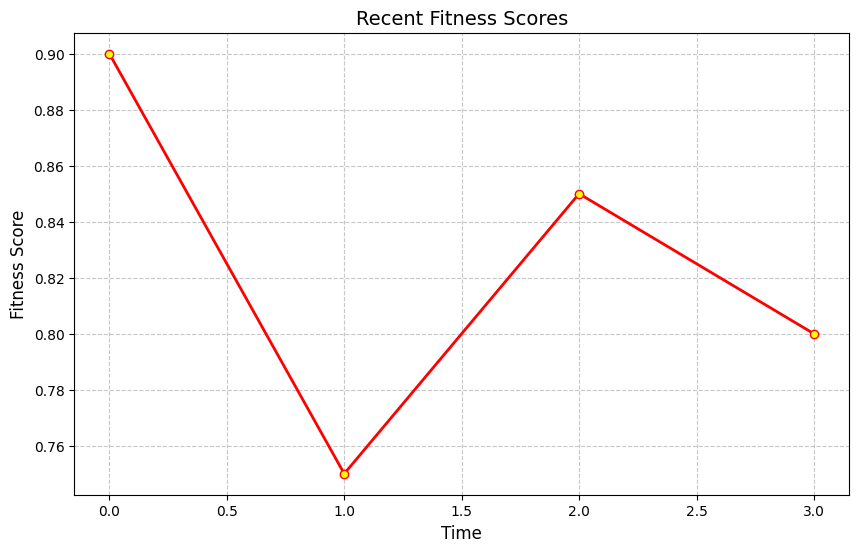


Trend Analysis - Random Forest Regression:
R-squared value: 0.6021
Mean Squared Error: 0.0012

Trend Analysis - Gradient Boosting Regression:
R-squared value: 1.0000
Mean Squared Error: 0.0000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

class HealthParams:
    def __init__(self, value):
        self.value = value
        self.next = None

class HealthVitalsLinkedList:
    def __init__(self):
        self.head = None

    def prepend(self, value):
        new_node = HealthParams(value)
        new_node.next = self.head
        self.head = new_node

    def get_recent_fit_scores(self, n):
        recent_fit_scores = []
        current_node = self.head
        while current_node and n > 0:
            recent_fit_scores.append(current_node.value)
            current_node = current_node.next
            n -= 1
        return recent_fit_scores

def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Invalid input. Please enter a valid number.")

def create_sample_linked_list(linked_list, values):
    for value in values:
        linked_list.prepend(value)

def main():
    heart_rate_list = HealthVitalsLinkedList()
    sleep_duration_list = HealthVitalsLinkedList()
    systolic_bp_list = HealthVitalsLinkedList()
    diastolic_bp_list = HealthVitalsLinkedList()
    stress_level_list = HealthVitalsLinkedList()
    fitness_score_list = HealthVitalsLinkedList()

    # Create a sample linked list with pre-filled values for testing
    create_sample_linked_list(heart_rate_list, [72, 75, 78, 80])
    create_sample_linked_list(sleep_duration_list, [7.5, 8, 7, 7.8])
    create_sample_linked_list(systolic_bp_list, [120, 118, 122, 125])
    create_sample_linked_list(diastolic_bp_list, [80, 82, 78, 85])
    create_sample_linked_list(stress_level_list, [6, 7, 5, 8])
    create_sample_linked_list(fitness_score_list, [0.8, 0.85, 0.75, 0.9])

    # Calculate and display the overall fitness score
    n = int(input("Enter the number of fitness scores to consider for rolling window average: "))

    def plot_recent_fit_scores(recent_fit_scores):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(recent_fit_scores)), recent_fit_scores, marker='o', markerfacecolor='yellow', linestyle='-', color='r', linewidth=2)
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Fitness Score', fontsize=12)
        plt.title('Recent Fitness Scores', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Save the plot as a high-quality PNG image
        plt.savefig('recent_fit_scores.png', format='png', dpi=2500)

        # Show the plot on the screen
        plt.show()

    # n = int(input("Enter the number of fitness scores to consider for the plot: "))
    recent_fit_scores = fitness_score_list.get_recent_fit_scores(n)
    plot_recent_fit_scores(recent_fit_scores)

    # Convert the linked list to a pandas DataFrame for regression
    df = pd.DataFrame({"Fitness Score": recent_fit_scores})

    # Prepare the data for regression
    X = np.arange(len(df)).reshape(-1, 1)
    y = df["Fitness Score"]

    # # Fit a Random Forest Regression model
    # model_rf = RandomForestRegressor(n_estimators=100, random_state=28)
    # model_rf.fit(X, y)
    # y_pred_rf = model_rf.predict(X)
    # r2_rf = r2_score(y, y_pred_rf)
    # mse_rf = mean_squared_error(y, y_pred_rf)

    # print("\nTrend Analysis - Random Forest Regression:")
    # print(f"R-squared value: {r2_rf:.4f}")
    # print(f"Mean Squared Error: {mse_rf:.4f}")

    # Fit a Gradient Boosting Regression model
    model_gb = GradientBoostingRegressor(n_estimators=100, random_state=28)
    model_gb.fit(X, y)
    y_pred_gb = model_gb.predict(X)
    r2_gb = r2_score(y, y_pred_gb)
    mse_gb = mean_squared_error(y, y_pred_gb)

    print("\nTrend Analysis - Gradient Boosting Regression:")
    print(f"R-squared value: {r2_gb:.4f}")
    print(f"Mean Squared Error: {mse_gb:.4f}")

if __name__ == "__main__":
    main()


In [ ]:
#hypertuned

Heart Rate: 80
Heart Rate: 78
Heart Rate: 75
Heart Rate: 72

Sleep Duration: 7.8
Sleep Duration: 7
Sleep Duration: 8
Sleep Duration: 7.5

Systolic Blood Pressure: 125
Systolic Blood Pressure: 122
Systolic Blood Pressure: 118
Systolic Blood Pressure: 120

Diastolic Blood Pressure: 85
Diastolic Blood Pressure: 78
Diastolic Blood Pressure: 82
Diastolic Blood Pressure: 80

Stress Level: 8
Stress Level: 5
Stress Level: 7
Stress Level: 6

Fitness Score: 0.9
Fitness Score: 0.75
Fitness Score: 0.85
Fitness Score: 0.8

Enter the number of fitness scores to consider for rolling window average: 4


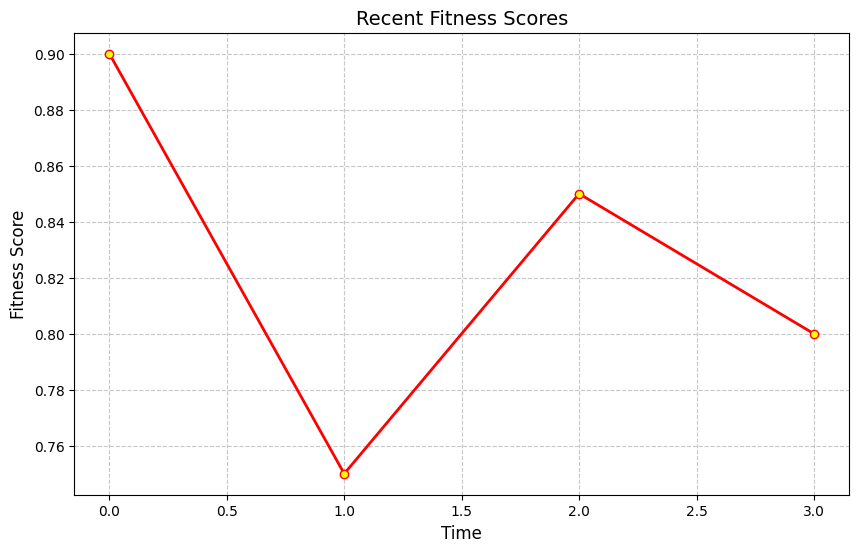


Trend Analysis - Gradient Boosting Regression (with Hyperparameter Tuning):
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
R-squared value: 0.6340
Mean Squared Error: 0.0011


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

class HealthParams:
    def __init__(self, value):
        self.value = value
        self.next = None

class HealthVitalsLinkedList:
    def __init__(self):
        self.head = None

    def prepend(self, value):
        new_node = HealthParams(value)
        new_node.next = self.head
        self.head = new_node

    def get_recent_fit_scores(self, n):
        recent_fit_scores = []
        current_node = self.head
        while current_node and n > 0:
            recent_fit_scores.append(current_node.value)
            current_node = current_node.next
            n -= 1
        return recent_fit_scores

def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Invalid input. Please enter a valid number.")

def create_sample_linked_list(linked_list, values):
    for value in values:
        linked_list.prepend(value)

def main():
    heart_rate_list = HealthVitalsLinkedList()
    sleep_duration_list = HealthVitalsLinkedList()
    systolic_bp_list = HealthVitalsLinkedList()
    diastolic_bp_list = HealthVitalsLinkedList()
    stress_level_list = HealthVitalsLinkedList()
    fitness_score_list = HealthVitalsLinkedList()

    # Create a sample linked list with pre-filled values for testing
    create_sample_linked_list(heart_rate_list, [72, 75, 78, 80])
    create_sample_linked_list(sleep_duration_list, [7.5, 8, 7, 7.8])
    create_sample_linked_list(systolic_bp_list, [120, 118, 122, 125])
    create_sample_linked_list(diastolic_bp_list, [80, 82, 78, 85])
    create_sample_linked_list(stress_level_list, [6, 7, 5, 8])
    create_sample_linked_list(fitness_score_list, [0.8, 0.85, 0.75, 0.9])

    # Display the linked lists for each health vital
    def display_linked_list(linked_list, health_vital_name):
        current = linked_list.head
        while current:
            print(f"{health_vital_name}: {current.value}")
            current = current.next
        print()

    display_linked_list(heart_rate_list, "Heart Rate")
    display_linked_list(sleep_duration_list, "Sleep Duration")
    display_linked_list(systolic_bp_list, "Systolic Blood Pressure")
    display_linked_list(diastolic_bp_list, "Diastolic Blood Pressure")
    display_linked_list(stress_level_list, "Stress Level")
    display_linked_list(fitness_score_list, "Fitness Score")

    # Calculate and display the overall fitness score
    n = int(input("Enter the number of fitness scores to consider for rolling window average: "))

    def plot_recent_fit_scores(recent_fit_scores):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(recent_fit_scores)), recent_fit_scores, marker='o', markerfacecolor='yellow', linestyle='-', color='r', linewidth=2)
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Fitness Score', fontsize=12)
        plt.title('Recent Fitness Scores', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Save the plot as a high-quality PNG image
        plt.savefig('recent_fit_scores.png', format='png', dpi=2500)

        # Show the plot on the screen
        plt.show()

    recent_fit_scores = fitness_score_list.get_recent_fit_scores(n)
    plot_recent_fit_scores(recent_fit_scores)

    # Convert the linked list to a pandas DataFrame for regression
    df = pd.DataFrame({"Fitness Score": recent_fit_scores})

    # Prepare the data for regression
    X = np.arange(len(df)).reshape(-1, 1)
    y = df["Fitness Score"]

    # Fit a Gradient Boosting Regression model with hyperparameter tuning
    param_grid_gb = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 7]
    }

    grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=28), param_grid_gb, cv=2)
    grid_search_gb.fit(X, y)

    best_params_gb = grid_search_gb.best_params_
    best_model_gb = grid_search_gb.best_estimator_

    y_pred_gb = best_model_gb.predict(X)
    r2_gb = r2_score(y, y_pred_gb)
    mse_gb = mean_squared_error(y, y_pred_gb)

    print("\nTrend Analysis - Gradient Boosting Regression (with Hyperparameter Tuning):")
    print(f"Best Parameters: {best_params_gb}")
    print(f"R-squared value: {r2_gb:.4f}")
    print(f"Mean Squared Error: {mse_gb:.4f}")

if __name__ == "__main__":
    main()


Enter the number of fitness scores to consider for rolling window average: 4


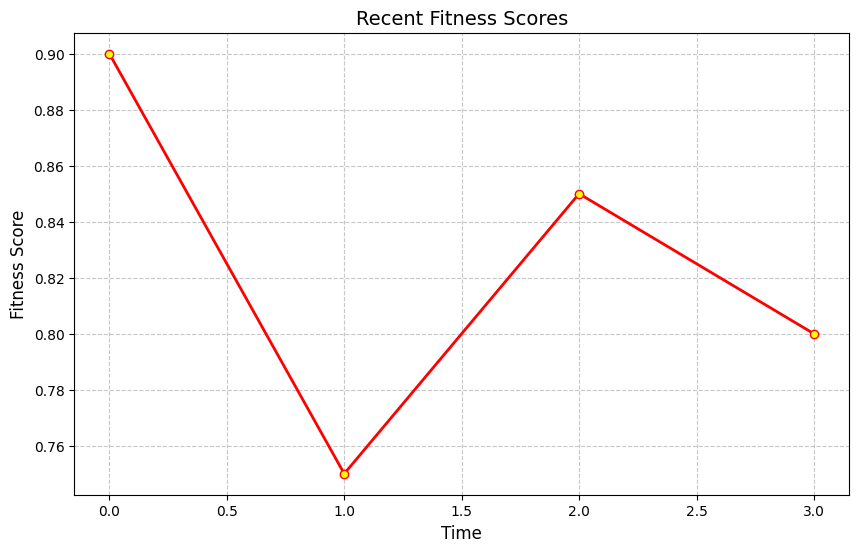


Trend Analysis - Gradient Boosting Regression (with Hyperparameter Tuning):
R-squared value: 0.6340
Mean Squared Error: 0.0011


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

class HealthParams:
    def __init__(self, value):
        self.value = value
        self.next = None

class HealthVitalsLinkedList:
    def __init__(self):
        self.head = None

    def prepend(self, value):
        new_node = HealthParams(value)
        new_node.next = self.head
        self.head = new_node

    def get_recent_fit_scores(self, n):
        recent_fit_scores = []
        current_node = self.head
        while current_node and n > 0:
            recent_fit_scores.append(current_node.value)
            current_node = current_node.next
            n -= 1
        return recent_fit_scores

def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Invalid input. Please enter a valid number.")

def create_sample_linked_list(linked_list, values):
    for value in values:
        linked_list.prepend(value)

def main():
    heart_rate_list = HealthVitalsLinkedList()
    sleep_duration_list = HealthVitalsLinkedList()
    systolic_bp_list = HealthVitalsLinkedList()
    diastolic_bp_list = HealthVitalsLinkedList()
    stress_level_list = HealthVitalsLinkedList()
    fitness_score_list = HealthVitalsLinkedList()

    # Create a sample linked list with pre-filled values for testing
    create_sample_linked_list(heart_rate_list, [72, 75, 78, 80])
    create_sample_linked_list(sleep_duration_list, [7.5, 8, 7, 7.8])
    create_sample_linked_list(systolic_bp_list, [120, 118, 122, 125])
    create_sample_linked_list(diastolic_bp_list, [80, 82, 78, 85])
    create_sample_linked_list(stress_level_list, [6, 7, 5, 8])
    create_sample_linked_list(fitness_score_list, [0.8, 0.85, 0.75, 0.9])

    # Calculate and display the overall fitness score
    n = int(input("Enter the number of fitness scores to consider for rolling window average: "))

    def plot_recent_fit_scores(recent_fit_scores):
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(recent_fit_scores)), recent_fit_scores, marker='o', markerfacecolor='yellow', linestyle='-', color='r', linewidth=2)
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Fitness Score', fontsize=12)
        plt.title('Recent Fitness Scores', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Save the plot as a high-quality PNG image
        plt.savefig('recent_fit_scores.png', format='png', dpi=2500)

        # Show the plot on the screen
        plt.show()

    # n = int(input("Enter the number of fitness scores to consider for the plot: "))
    recent_fit_scores = fitness_score_list.get_recent_fit_scores(n)
    plot_recent_fit_scores(recent_fit_scores)

    # Convert the linked list to a pandas DataFrame for regression
    df = pd.DataFrame({"Fitness Score": recent_fit_scores})

    # Prepare the data for regression
    X = np.arange(len(df)).reshape(-1, 1)
    y = df["Fitness Score"]

    # Perform Hyperparameter Tuning using GridSearchCV for Gradient Boosting Regression
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
    model_gb = GradientBoostingRegressor(random_state=28,learning_rate= 0.01, max_depth=3, n_estimators= 50)
    # grid_search = GridSearchCV(model_gb, param_grid, cv=3)
    model_gb.fit(X, y)

    # # Get the best parameters and model
    # best_params = grid_search.best_params_
    # best_model = grid_search.best_estimator_

    print("\nTrend Analysis - Gradient Boosting Regression (with Hyperparameter Tuning):")
    # print(f"Best Parameters: {best_params}")
    y_pred_gb = model_gb.predict(X)
    r2_gb = r2_score(y, y_pred_gb)
    mse_gb = mean_squared_error(y, y_pred_gb)
    print(f"R-squared value: {r2_gb:.4f}")
    print(f"Mean Squared Error: {mse_gb:.4f}")

if __name__ == "__main__":
    main()
